In [1]:
import pandas as pd
import numpy as np
import os
print os.getcwd()
dir = "/Users/walterdempsey/Box/MD2K Processed Data/smoking-lvm-cleaned-data/"
os.chdir(dir)
os.getcwd()

/Users/walterdempsey/Documents/github/sense2stop-lvm/data_summary


'/Users/walterdempsey/Box/MD2K Processed Data/smoking-lvm-cleaned-data'

In [2]:
# read data
original_data = pd.read_csv(dir + "puff-probability.csv")
original_data = original_data.drop(['offset'], axis=1)
backup_data = pd.read_csv(dir + "puff-probability-backup.csv")

original_data = original_data.dropna()
backup_data = backup_data.dropna()

In [3]:
# check data types
print(original_data.dtypes)
print("")
print(backup_data.dtypes)

# convert data types to be consistent
backup_data['participant_id'] = backup_data['participant_id'].astype(float)
backup_data['hour'] = backup_data['hour'].astype(float)
backup_data['minute'] = backup_data['minute'].astype(float)
original_data['participant_id'] = original_data['participant_id'].astype(float)
print(original_data.dtypes)
print(backup_data.dtypes)

timestamp         float64
event             float64
participant_id    float64
date               object
hour              float64
minute            float64
day_of_week        object
dtype: object

timestamp         float64
event             float64
participant_id      int64
date               object
hour                int64
minute              int64
day_of_week        object
dtype: object
timestamp         float64
event             float64
participant_id    float64
date               object
hour              float64
minute            float64
day_of_week        object
dtype: object
timestamp         float64
event             float64
participant_id    float64
date               object
hour              float64
minute            float64
day_of_week        object
dtype: object


In [4]:
# summary of the original data
print("PUFF_PROBABILITY original Data Summary:")
print(original_data.describe())

PUFF_PROBABILITY original Data Summary:
          timestamp         event  participant_id          hour        minute
count  1.061700e+04  10617.000000    10617.000000  10617.000000  10617.000000
mean   1.513053e+12      0.679035      217.291608     14.725911     29.484600
std    9.317371e+09      0.221521        9.242572      4.869340     17.340189
min    1.498250e+12      0.306922      201.000000      0.000000      0.000000
25%    1.507570e+12      0.474700      211.000000     12.000000     14.000000
50%    1.509670e+12      0.693627      216.000000     15.000000     30.000000
75%    1.523210e+12      0.890572      228.000000     18.000000     45.000000
max    1.532810e+12      0.999999      237.000000     23.000000     59.000000


In [5]:
# summary of the backup data
print("PUFF_PROBABILITY backup Data Summary:")
print(backup_data.describe())

PUFF_PROBABILITY backup Data Summary:
          timestamp         event  participant_id          hour        minute
count  1.097900e+04  10979.000000    10979.000000  10979.000000  10979.000000
mean   1.512491e+12      0.678763      216.774296     14.767101     29.577466
std    9.011215e+09      0.221671        9.005316      4.800895     17.298192
min    1.498492e+12      0.306922      202.000000      0.000000      0.000000
25%    1.507235e+12      0.474698      211.000000     12.000000     15.000000
50%    1.509639e+12      0.691359      215.000000     15.000000     30.000000
75%    1.512581e+12      0.890199      222.000000     18.000000     45.000000
max    1.532815e+12      0.999999      237.000000     23.000000     59.000000


In [30]:
original_data.shape

(10617, 7)

In [31]:
backup_data.shape

(10979, 7)

In [32]:
# count rows per participant
original_data['participant_id'].value_counts().sort_index()

201.0      68
202.0     426
203.0      47
205.0     899
206.0      79
207.0     389
208.0     113
209.0      86
210.0      22
211.0    1004
212.0     251
213.0     186
214.0     792
215.0     841
216.0     377
217.0     615
218.0     554
219.0     621
220.0     241
221.0      71
222.0     151
228.0     985
229.0     339
230.0     429
231.0     177
232.0       5
233.0     379
234.0     128
235.0     282
236.0      11
237.0      49
Name: participant_id, dtype: int64

In [33]:
backup_data['participant_id'].value_counts().sort_index()

202.0     426
204.0     143
205.0     899
207.0     570
208.0     346
209.0      86
211.0    1004
212.0     251
213.0     194
214.0     792
215.0     856
216.0     385
217.0     626
218.0     554
219.0     621
220.0     291
222.0     490
228.0     985
230.0     429
231.0     177
232.0       5
233.0     379
234.0     128
235.0     282
236.0      11
237.0      49
Name: participant_id, dtype: int64

In [7]:
# Look at the participant_id intersection of the backup and original datasets
unique_backup_ids = set(backup_data.participant_id)
unique_original_ids = set(original_data.participant_id)
ids_intersection = unique_backup_ids.intersection(unique_original_ids)

original_data_subset = original_data[original_data.participant_id.isin(ids_intersection)]
backup_data_subset = backup_data[backup_data.participant_id.isin(ids_intersection)]

print unique_backup_ids.difference(unique_original_ids)
print unique_original_ids.difference(unique_backup_ids)

set([204.0])
set([229.0, 201.0, 203.0, 206.0, 210.0, 221.0])


In [11]:
# In intersection, the backup is a superset of the observations. 
# Therefore, the backup shoud be used for analysis where possible.
print(original_data_subset.shape)
temp_original = pd.DataFrame(original_data_subset['participant_id'].value_counts().sort_index())
temp_backup = np.array(backup_data_subset['participant_id'].value_counts().sort_index())
temp_original['backup'] = temp_backup
temp_original.columns = ['original', 'backup']
print(temp_original)

print temp_original['backup'] -temp_original['original']
sum(temp_original['backup'] -temp_original['original'])


(9991, 7)
       original  backup
202.0       426     426
205.0       899     899
207.0       389     570
208.0       113     346
209.0        86      86
211.0      1004    1004
212.0       251     251
213.0       186     194
214.0       792     792
215.0       841     856
216.0       377     385
217.0       615     626
218.0       554     554
219.0       621     621
220.0       241     291
222.0       151     490
228.0       985     985
230.0       429     429
231.0       177     177
232.0         5       5
233.0       379     379
234.0       128     128
235.0       282     282
236.0        11      11
237.0        49      49
202.0      0
205.0      0
207.0    181
208.0    233
209.0      0
211.0      0
212.0      0
213.0      8
214.0      0
215.0     15
216.0      8
217.0     11
218.0      0
219.0      0
220.0     50
222.0    339
228.0      0
230.0      0
231.0      0
232.0      0
233.0      0
234.0      0
235.0      0
236.0      0
237.0      0
dtype: int64


845

In [12]:
s1 = set() # cloud data only
s2 = set() # phone data only

d = {}
lst2 = []
lst1 = []
for index, row in backup_data.iterrows():
    participant_id = row['participant_id']
    hour = row['hour']
    minute = row['minute']
    day_of_week = row['day_of_week']
    valid_key = (participant_id, hour, minute, day_of_week)
    s1.add(valid_key)
    d[valid_key] = index

for index, row in original_data.iterrows():
    participant_id = row['participant_id']
    hour = row['hour']
    minute = row['minute']
    day_of_week = row['day_of_week']
    valid_key = (participant_id, hour, minute, day_of_week)
    if valid_key in s1:
        s1.remove(valid_key)
    else:
        # print(index)
        lst2.append(index)

lst1 = []
for i in s1:
    lst1.append(d[i])

lst1.sort()
difference = backup_data.ix[lst1].dropna()
print(difference.shape)
difference # rows in the backup but not in the original

(840, 7)


/Library/Python/2.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,timestamp,event,participant_id,date,hour,minute,day_of_week
426,1.502742e+12,0.425547,204.0,2017-08-14 16:17:23,16.0,17.0,Monday
427,1.502743e+12,0.320380,204.0,2017-08-14 16:32:55,16.0,32.0,Monday
428,1.502743e+12,0.993070,204.0,2017-08-14 16:33:19,16.0,33.0,Monday
430,1.502743e+12,0.607866,204.0,2017-08-14 16:42:53,16.0,42.0,Monday
432,1.502743e+12,0.411094,204.0,2017-08-14 16:43:28,16.0,43.0,Monday
433,1.502744e+12,0.704334,204.0,2017-08-14 16:45:12,16.0,45.0,Monday
434,1.502744e+12,0.380761,204.0,2017-08-14 16:50:28,16.0,50.0,Monday
435,1.502744e+12,0.632100,204.0,2017-08-14 16:52:56,16.0,52.0,Monday
436,1.502744e+12,0.510877,204.0,2017-08-14 16:54:40,16.0,54.0,Monday
437,1.502744e+12,0.335215,204.0,2017-08-14 16:55:00,16.0,55.0,Monday


In [37]:
difference = original_data.ix[lst2]
print(difference.shape)
difference # rows in the original but not in the backup

(2112, 7)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,timestamp,event,participant_id,date,hour,minute,day_of_week
0,1.498250e+12,0.638740,201.0,6/23/17 16:35,16.0,35.0,Friday
1,1.498250e+12,0.702948,201.0,6/23/17 16:52,16.0,52.0,Friday
2,1.498250e+12,0.794518,201.0,6/23/17 16:53,16.0,53.0,Friday
3,1.498250e+12,0.993425,201.0,6/23/17 17:06,17.0,6.0,Friday
4,1.498250e+12,0.931466,201.0,6/23/17 17:10,17.0,10.0,Friday
5,1.498250e+12,0.892506,201.0,6/23/17 17:36,17.0,36.0,Friday
6,1.498260e+12,0.718888,201.0,6/23/17 17:57,17.0,57.0,Friday
7,1.498260e+12,0.533107,201.0,6/23/17 18:20,18.0,20.0,Friday
8,1.498260e+12,0.672633,201.0,6/23/17 18:56,18.0,56.0,Friday
9,1.498260e+12,0.777453,201.0,6/23/17 18:56,18.0,56.0,Friday


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


participant_id
202.0    AxesSubplot(0.125,0.125;0.775x0.755)
204.0    AxesSubplot(0.125,0.125;0.775x0.755)
205.0    AxesSubplot(0.125,0.125;0.775x0.755)
207.0    AxesSubplot(0.125,0.125;0.775x0.755)
208.0    AxesSubplot(0.125,0.125;0.775x0.755)
209.0    AxesSubplot(0.125,0.125;0.775x0.755)
211.0    AxesSubplot(0.125,0.125;0.775x0.755)
212.0    AxesSubplot(0.125,0.125;0.775x0.755)
213.0    AxesSubplot(0.125,0.125;0.775x0.755)
214.0    AxesSubplot(0.125,0.125;0.775x0.755)
215.0    AxesSubplot(0.125,0.125;0.775x0.755)
216.0    AxesSubplot(0.125,0.125;0.775x0.755)
217.0    AxesSubplot(0.125,0.125;0.775x0.755)
218.0    AxesSubplot(0.125,0.125;0.775x0.755)
219.0    AxesSubplot(0.125,0.125;0.775x0.755)
220.0    AxesSubplot(0.125,0.125;0.775x0.755)
222.0    AxesSubplot(0.125,0.125;0.775x0.755)
228.0    AxesSubplot(0.125,0.125;0.775x0.755)
230.0    AxesSubplot(0.125,0.125;0.775x0.755)
231.0    AxesSubplot(0.125,0.125;0.775x0.755)
232.0    AxesSubplot(0.125,0.125;0.775x0.755)
233.0    AxesSubplo

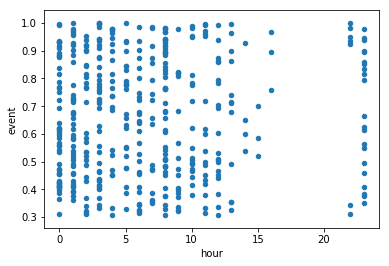

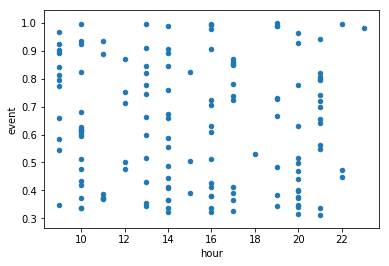

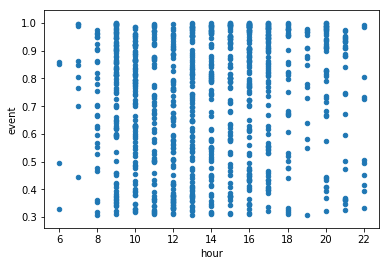

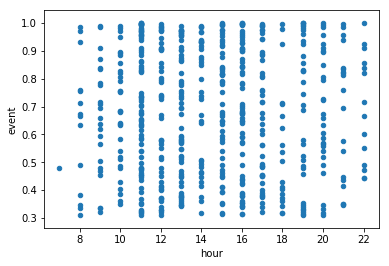

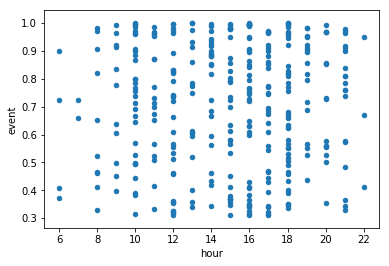

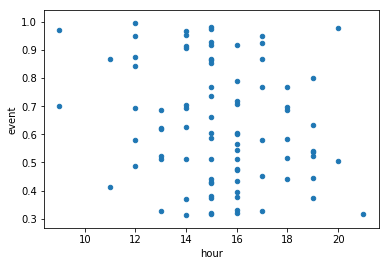

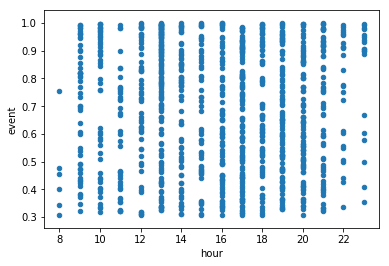

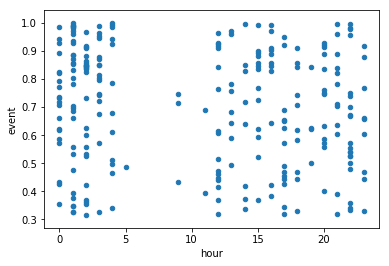

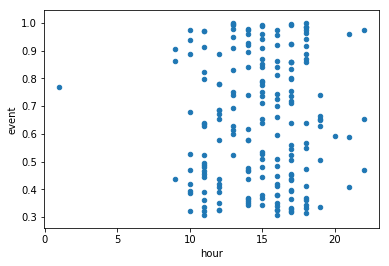

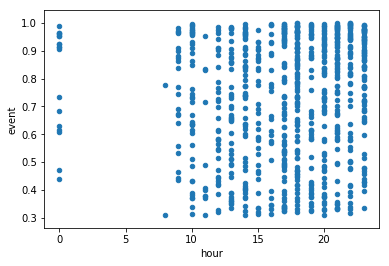

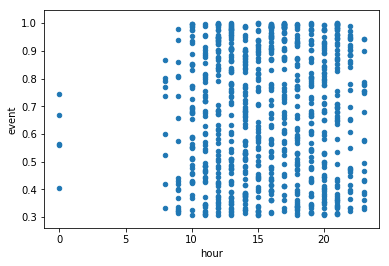

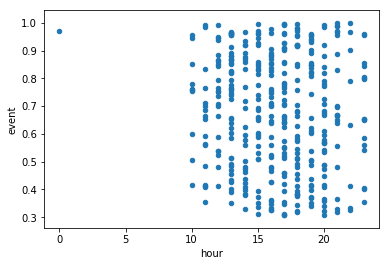

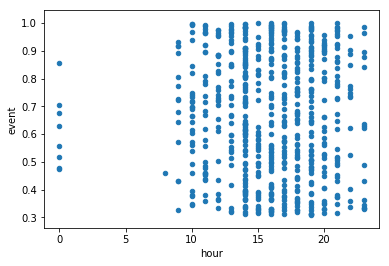

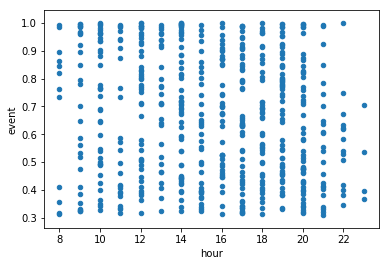

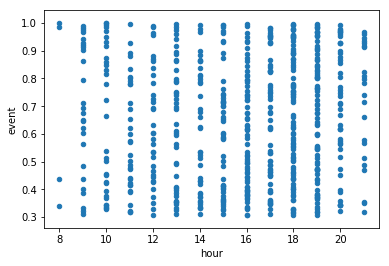

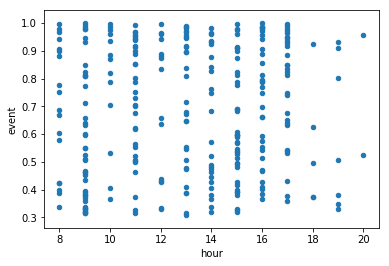

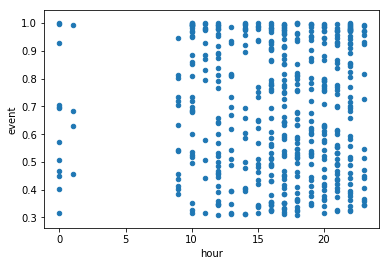

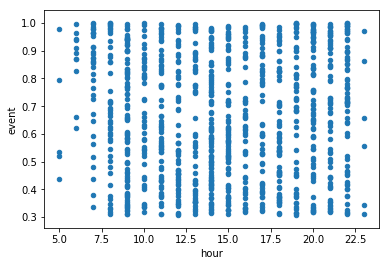

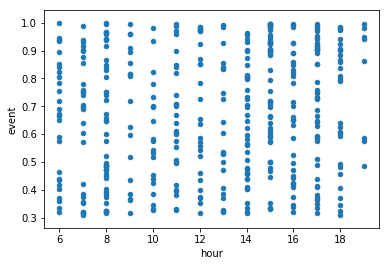

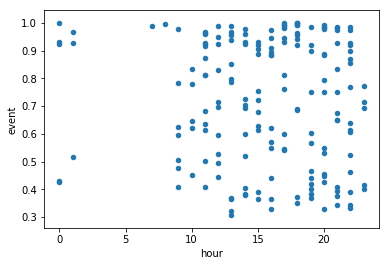

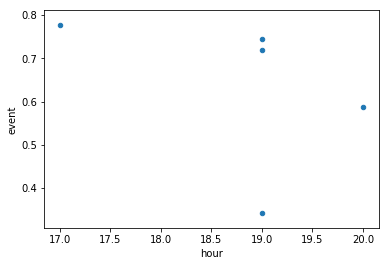

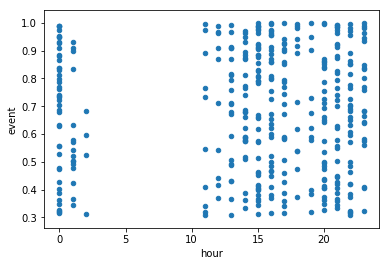

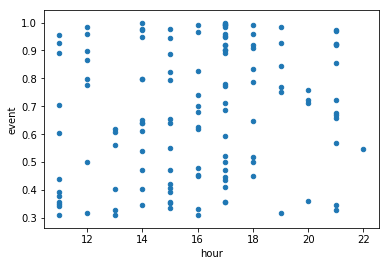

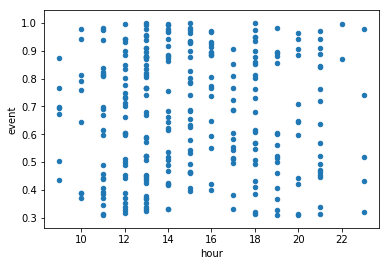

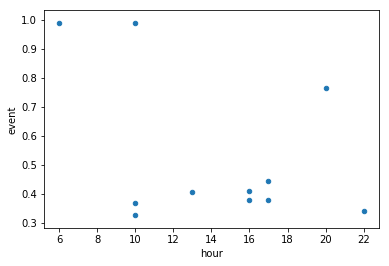

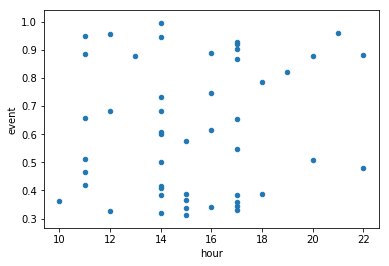

In [38]:
backup_data.groupby('participant_id').plot(y='event', x='hour', kind="scatter", legend=True)